In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA

In [2]:
X = np.loadtxt('Viscosity.txt')
n = X.shape[0]
d = X.shape[1]
d -= 1
print(n,d)

499 190


In [3]:
n_train = int(n*0.8)
n_test  = n - n_train
#X = np.random.permutation(X)

X_train = np.zeros((n_train,d))
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train,1))
Y_test = np.zeros((n_test,1))

X_train[:] = X[:n_train,:-1]
Y_train[:] = np.log(X[:n_train,-1]).reshape((n_train,1))

X_test[:] = X[n_train:,:-1]
Y_test[:] = np.log(X[n_train:,-1]).reshape((n_test,1))

print(X_train.shape)
print(X_test.shape)

f = open('Deslist','r')
Deslist = []
for line in f:
    Deslist.append(line.strip('\n\t'))
print(Deslist)

(399, 190)
(100, 190)
['steiger', 'Marsili Partial Charges', 'BalabanJ', 'BertzCT', 'Ipc', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'Chi0', 'Chi1', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v', 'Chi4v', 'MolLogP', 'MolMR', 'MolWt', 'HeavyAtomCount', 'HeavyAtomMolWt', 'NHOHCount', 'NOCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'RingCount', 'TPSA', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'SMR_VSA1', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SMR_VSA10', 'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'EState_VSA1', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', '

In [13]:
#initializing weight for first layer(w1) and second
#Parameters
hdnode = 300
w1 = np.random.normal(0,0.001,d*hdnode).reshape((d,hdnode))
d1 = np.zeros((d,hdnode))
w2 = np.random.normal(0,0.001,hdnode).reshape((hdnode,1))
d2 = np.zeros(hdnode)
h  = np.zeros(hdnode)
              
mb = 3 #minibatch size
m = int(n_train/mb)
batch = np.arange(m)
lr = 0.0001
EP = 3000
samp = 10000
y = np.zeros((mb,1))
yh = np.zeros((n_train,1))
yh2 = np.zeros((n_test,1))

L_train= np.zeros(EP+1)
L_test = np.zeros(EP+1)

L01_train = np.zeros((EP+1))
L01_test = np.zeros((EP+1))

#Training the neural network
def g(A):
    return (np.tanh(A))

def gd(A):
    return (1-np.square(np.tanh(A)))

for ep in range(EP):
    #print(ep)

    yh = g(X_train.dot(w1)).dot(w2)
    yh2 = g(X_test.dot(w1)).dot(w2)
        
    L_train[ep] = LA.norm(yh-Y_train)/n_train
    L_test[ep]  = LA.norm(yh2-Y_test)/n_test
    
    print(ep,L_train[ep],L_test[ep])
        
    np.random.shuffle(batch)
    for i in range(m):
        st = batch[i]*mb
        ed = (batch[i]+1)*mb
        
        h  = g(X_train[st:ed].dot(w1))
        y = h.dot(w2)

        d2 = h.T.dot(Y_train[st:ed]-y)
        d1 = X_train[st:ed].T.dot(np.multiply((Y_train[st:ed]-y).dot(w2.T),gd(X_train[st:ed].dot(w1))))
        
        w2 += lr*d2
        w1 += lr*d1

0 0.16991833998 0.403251555853
1 0.0578323268923 0.154339891843
2 0.0575793580767 0.153798739181
3 0.0572870505922 0.151618916071
4 0.0586056177965 0.141102616172
5 0.0584528014026 0.141427420915
6 0.058515887401 0.140165335101
7 0.0571426639473 0.149460247345
8 0.0572695543065 0.149815484065
9 0.0575962846619 0.167425485038
10 0.056883782014 0.150827554216
11 0.0568972614534 0.151241455642
12 0.0566938509775 0.15914009179
13 0.0570803255136 0.164840263674
14 0.0606833850333 0.185661939344
15 0.0583578296244 0.174966921594
16 0.0566863733116 0.159558255975
17 0.0581473438795 0.172649343483
18 0.057932121319 0.172033426062
19 0.0565311829177 0.158772233286
20 0.0580631352711 0.174785708669
21 0.0575308944929 0.171955590642
22 0.0566024334004 0.157462911163
23 0.0565527400151 0.158989810829
24 0.0565740099904 0.164486513532
25 0.0570649830637 0.169697254579
26 0.0565571427908 0.157925777727
27 0.0604827431615 0.141860356402
28 0.0565352875525 0.165401467171
29 0.056910352759 0.1698915228

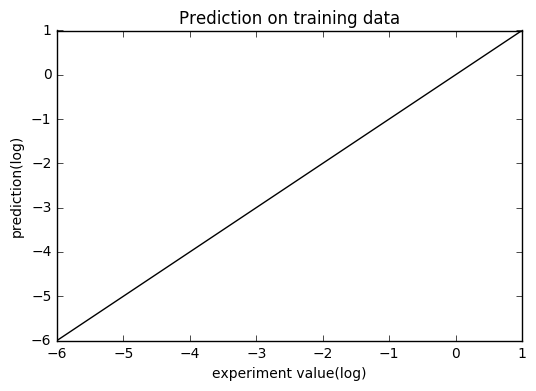

In [8]:
yh = g(X_train.dot(w1)).dot(w2)
plt.plot(Y_train,yh,"o",color ='purple')
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on training data')
plt.show()

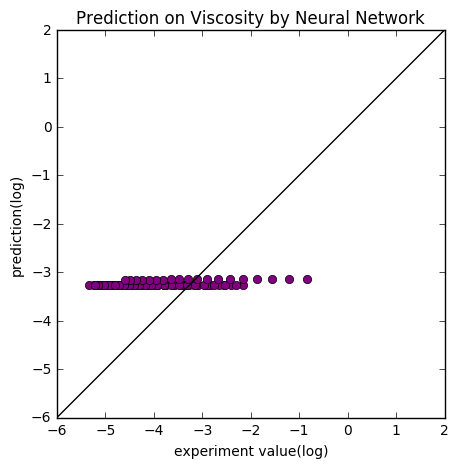

In [6]:
yh = g(X_test.dot(w1)).dot(w2)
plt.figure(figsize=(5,5))
plt.plot(Y_test,yh,"o",color ='purple')
plt.plot(np.arange(-6,2,0.0001),np.arange(-6,2,0.0001),color = 'black')
plt.axis([-6,2,-6,2])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on Viscosity by Neural Network')
plt.show()